# **Partícula en una caixa**

## ***Caixa unidimensional***
El que es pot fer amb Python és graficar la forma més bàsica de la funció d'ona d'una partícula en una caixa unidimensonal:
$$ \psi_n(x)=\sqrt{\frac{2}{L}}\sin{\left(\frac{n\pi}{L}x\right)} $$
Primer necessitem importal les següents llibreries (per a aquesta part en concret):

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as pyplt
%matplotlib inline
import numpy as np

Un cop tenim importades les llibreries, ja posem començar a escriure el codi que ens permeterà observar aquesta funció en funció de *n*, és a dir, del nombre quàntic principal.

Primer caldrà determinal la llargada de la caixa unidimensional (***L***).

In [ ]:
L = 1         # Llargada de la caixa
x_list = np.linspace(0,L,100)       # Aquest són els valors que necessitem per a poder fer les gràfiques

Ara caldrà definir les funcions que volem graficar. Com volem veure la pròpia funció i el seu quadrat (funció probabilitat), caldrà definir-les per separat.

In [ ]:
def psi(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)
def psi_2(n,L,x):
    return np.square(psi(n,L,x))

I ara ja si, fem les gràfiques.

>****Nota:*** No entrarem en detall en el codi de les gràfiques perquè ja està tot explicat en el document de gràfiques.

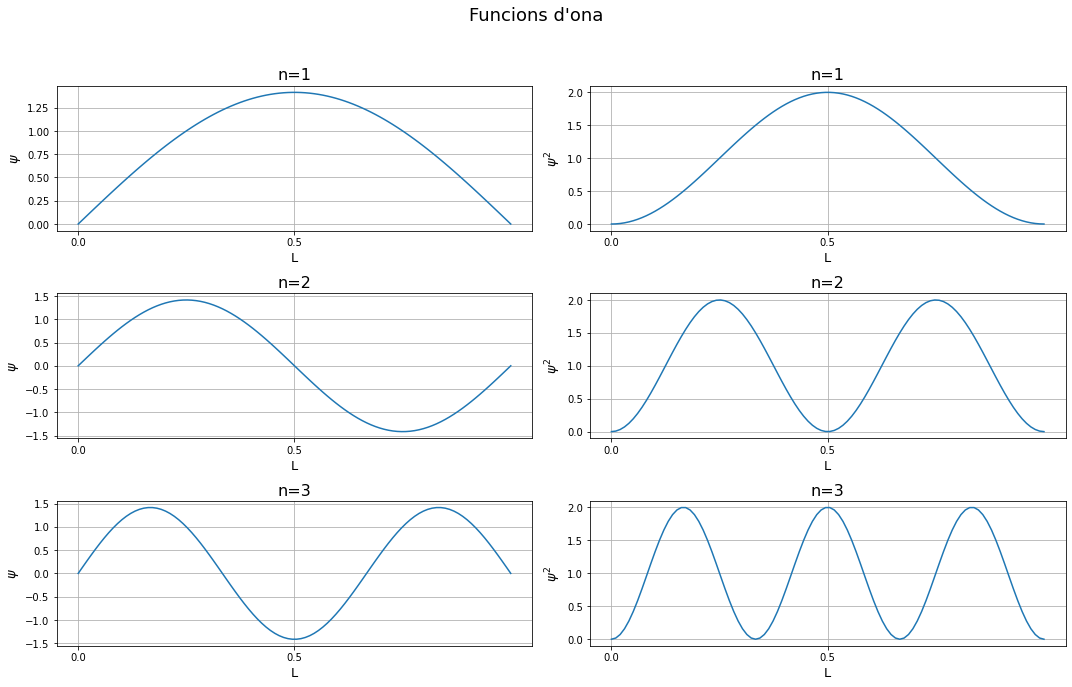

In [ ]:
pyplt.figure(figsize=(15,10))

pyplt.suptitle("Funcions d'ona", fontsize=18)

for n in range(1,4):

    psi_2_list = []
    psi_list = []
    
    for x in x_list:
        psi_2_list.append(psi_2(n,L,x))
        psi_list.append(psi(n,L,x))
    pyplt.subplot(3,2,2*n-1)
    pyplt.plot(x_list, psi_list)
    pyplt.xlabel("L", fontsize=13)
    pyplt.ylabel("$\psi$", fontsize=13)
    pyplt.xticks(np.arange(0, L, step=0.5))
    pyplt.title("n="+str(n), fontsize=16)
    pyplt.grid()
    pyplt.subplot(3,2,2*n)
    pyplt.plot(x_list, psi_2_list)
    pyplt.xlabel("L", fontsize=13)
    pyplt.ylabel("$\psi^2$", fontsize=13)
    pyplt.xticks(np.arange(0, L, step=0.5))
    pyplt.title("n="+str(n), fontsize=16)
    pyplt.grid()

pyplt.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplt.show()

D'aquesta manera, podem observar on trobarem un node d'aquesta funció i on està la major probabilitat de trobar la partícula en aquesta caixa unidimensional.

## ***Caixa bidimensional***
També es pot fer el mateix per una caixa bidimensional.

Evidentment, l'equació a utilitzar canviarà:
$$ \psi_n(x,y)=\sqrt{\frac{2}{L_x}}\sqrt{\frac{2}{L_y}}\sin{\left(\frac{n\pi}{L_x}x\right)\sin{\left(\frac{n\pi}{L_y}y\right)}} $$
Igual que amb l'exemple anterior, primer definirem algunes de les variables com $n$, $L_x$ i $L_y$.

In [ ]:
n = 1

Lx = 1**-10
Ly = 1**-10

x,y = np.linspace(0, Lx, 200), np.linspace(0, Ly, 200)

# Ax = np.sqrt(2/Lx)
# Ay = np.sqrt(2/Ly)

Ara definim la funció

In [ ]:
def psi_3d(a,b):
  return np.sqrt(2/Lx)*np.sqrt(2/Ly)*np.sin(n*np.pi*a/Lx)*np.sin(n*np.pi*b/Ly)
def psi2_3d(a,b):
  # return (np.sin((n*np.pi *a)/Lx)*np.sin((n*np.pi*b)/Lx))**2
  return np.square(psi_3d(a,b))

I tornem a fer les gràfiques. Aquestes les podem fer per separat

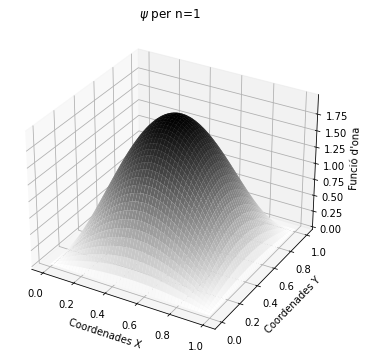

In [ ]:
X,Y = np.meshgrid(x,y)
psi = np.array([psi_3d(x,y) for x,y in zip(np.ravel(X),np.ravel(Y))])
PSI = psi.reshape(X.shape)

fig = pyplt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(X,Y,PSI, cmap = 'binary')
# ax.plot_surface(X,Y,PSI, cmap = 'winter')
# ax.plot_surface(X,Y,PSI, rstride=4, cstride=4, alpha=0.25)
# ax.plot_surface(X,Y,PSI, rstride=4, cstride=4)
# ax.plot_surface(X,Y,PSI, rstride=4, cstride=4, linewidth=5)
# ax.plot_wireframe(X,Y,PSI, rstride=4, cstride=4)
pyplt.xlabel('Coordenades X')
pyplt.ylabel('Coordenades Y')
ax.set_zlabel("Funció d'ona")
pyplt.title('$\psi$ per n=%s' %n)

pyplt.show()

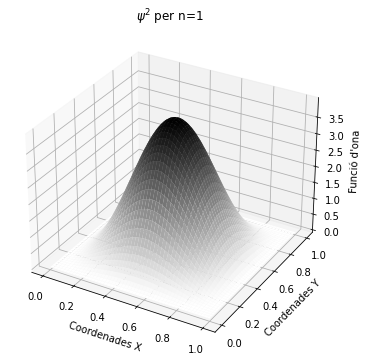

In [ ]:
X,Y = np.meshgrid(x,y)
psi2 = np.array([psi2_3d(x,y) for x,y in zip(np.ravel(X),np.ravel(Y))])
PSI2 = psi2.reshape(X.shape)


fig = pyplt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(X,Y,PSI2, cmap = 'binary')
# ax.plot_surface(X,Y,PSI2, cmap = 'winter')
# ax.plot_surface(X,Y,PSI2, rstride=4, cstride=4, alpha=0.25)
# ax.plot_surface(X,Y,PSI2, rstride=4, cstride=4)
# ax.plot_surface(X,Y,PSI2, rstride=4, cstride=4, linewidth=5)
# ax.plot_wireframe(X,Y,PSI2, rstride=4, cstride=4)
pyplt.xlabel('Coordenades X')
pyplt.ylabel('Coordenades Y')
ax.set_zlabel("Funció d'ona")
pyplt.title('$\psi^2$ per n=%s' %n)

pyplt.show()

O bé o podem fer de manera conjunta

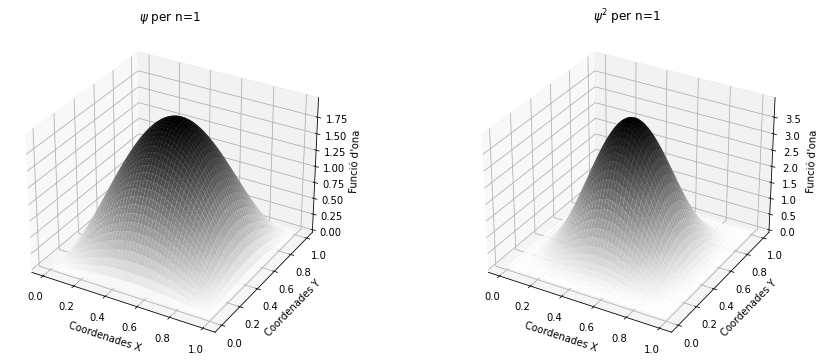

In [ ]:
X,Y = np.meshgrid(x,y)

psi = np.array([psi_3d(x,y) for x,y in zip(np.ravel(X),np.ravel(Y))])
PSI = psi.reshape(X.shape)
psi2 = np.array([psi2_3d(x,y) for x,y in zip(np.ravel(X),np.ravel(Y))])
PSI2 = psi2.reshape(X.shape)

fig = pyplt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')

ax1.plot_surface(X,Y,PSI, cmap = 'binary')
ax1.set_xlabel('Coordenades X')
ax1.set_ylabel('Coordenades Y')
ax1.set_zlabel("Funció d'ona")
ax1.set_title('$\psi$ per n=%s' %n)


ax2.plot_surface(X,Y,PSI2, cmap = 'binary')
ax2.set_xlabel('Coordenades X')
ax2.set_ylabel('Coordenades Y')
ax2.set_zlabel("Funció d'ona")
ax2.set_title('$\psi^2$ per n=%s' %n)

pyplt.show()

## ***Sel·lecció automàtica***
També es pot fer com una "mostra automàtica" de la funció d'ona i la seva funció de densitat de probabilitat.

Primer cal importar les llibreries necessàries i definir la funció de la partícula en una caixa vist anteriorment:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the wavefunction
def psi(x,n,L): return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

Ara cal saber per a quines característiques es vol graficar la funció. Això ho indicarà l'alumne:

In [ ]:
# Reading the input variables from the user
n = int(input("Digues el valor del nombre quàntic principal: n = "))
L = float(input("Digues la llargada de la caixa en Angstroms: L = "))

Digues el valor del nombre quàntic principal: n = 2
Digues la llargada de la caixa en Angstroms: L = 2


Amb les informacions que hem donat nosaltres de la funció i les caràcterístiques que volem que tingui aquesta funció, ja es poden fer les gràfiques.

Caracerísitiques de la funció: n=2; L=2.0


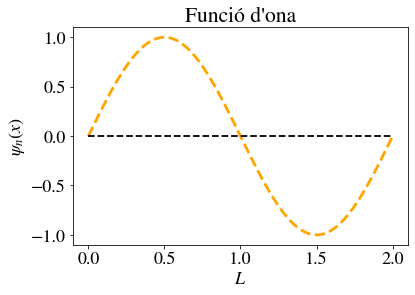

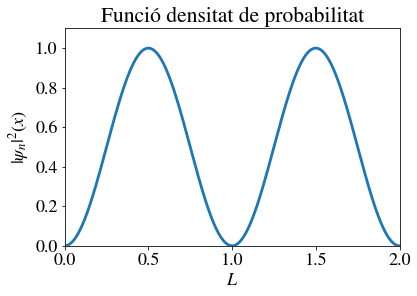

In [ ]:
print('Caracerísitiques de la funció: n=%s; L=%s' %(n,L))

# Funció d'ona
plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
x = np.linspace(0, L, 900)
fig, ax = plt.subplots()
ax.plot(x, psi(x,n,L), linestyle='--', color="orange", linewidth=2.8)
ax.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black")
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\psi_n(x)$')
plt.title("Funció d'ona")

# Funció densitat de probabilitat
fig, ax = plt.subplots()
lim1=np.sqrt(2.0/L)
ax.axis([0.0,L,0.0,lim1*lim1*1.1])
ax.plot(x, psi(x,n,L)*psi(x,n,L), linewidth=2.8)
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$|\psi_n|^2(x)$')
plt.title("Funció densitat de probabilitat")

plt.show()

# **Gràfica de la part radial d'orbitals**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import math

Generarem l'orbital 3s de l'hidrogen segona la formula

$$ \psi_{3s} = \frac{2}{27}\sqrt{3}(2r^{2/9} - 2r + 3)e^{-r/3} $$

Primer definim la funció amb el paquet *math* per a poder posar l'arrel i els exponents i després generem les dades que ens permetran graficar la part radial de l'orbital 3s.

In [ ]:
# definició de la funció
def orbital_3S(r):
    wf = (2/27)*math.sqrt(3)*(2*r**2/9 - 2*r + 3)* math.exp(-r/3)
    return wf

# generació de les dades
r = [num / 3 for num in range(1, 150, 1)]            # aquí estem generat valors entre 1 i 150 cada 3 números: 1,4,7...147,150
psi_3s = [orbital_3S(num)/4 for num in r]

Ara ja tenim els punts que es volen graficar, ara només cal implementar-los a la gràfica.

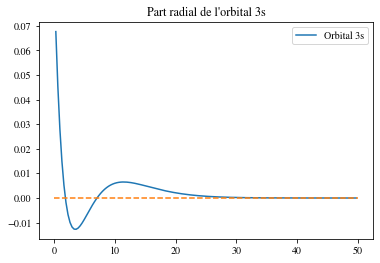

In [ ]:
plt.title("Part radial de l'orbital 3s")
plt.plot(r, psi_3s, '-', label='Orbital 3s')
plt.hlines(0, 0, 50, linestyle='dashed', color='C1')
plt.legend()
plt.show()